In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import re
from collections import Counter
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
#from geopy.geocoders import Nominatim
#from geopy.extra.rate_limiter import RateLimiter
from wordcloud import STOPWORDS, WordCloud


In [92]:
url = 'https://raw.githubusercontent.com/ronifahima/project-Roni-and-Gil/main/lovoo_v3_users_api-results%20(1).csv'
df_lovoo = pd.read_csv(url)
df_lovoo

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,crypt,freetext,whazzup,userId,pictureId,isSystemProfile
0,F,M,25,daeni,1.00,4,8279,239,0,3,...,1,2015-04-25T20:43:26Z,1.429995e+09,0,NaN,Nur tote Fisch schwimmen mit dem Strom,Nur tote fische schwimmen mit dem strom,4e3842f79b70e7ea57000064,55303fc3160ba0eb728b4575,NaN
1,F,M,22,italiana 92,0.85,5,663,13,0,0,...,1,2015-04-26T09:19:35Z,1.430040e+09,0,NaN,NaN,Primaveraaa<3,4e3d34bf5d2bce7b160006a3,552e7b61c66da10d1e8b4c82,NaN
2,F,M,21,Lauraaa,0.00,4,1369,88,0,2,...,1,2015-04-06T14:24:07Z,1.428330e+09,0,NaN,NaN,NaN,4ec96c090dc82cb25d00000a,54a584ecc56da128638b4674,NaN
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,1,2015-04-07T11:21:01Z,1.428406e+09,0,NaN,NaN,Je pense donc je suis. Instagram quedev,4eef8b81ebf2c8f64000000c,54c92738076ea1b5338b4735,NaN
4,F,M,21,schaessie {3,0.15,12,35262,1413,9,12,...,1,2015-04-06T14:25:20Z,1.428330e+09,0,NaN,NaN,Instagram: JESSSIESCH,4ef3cc5aa9d0b3d07d000017,54e1a6f6c76da135748b4a3a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,F,M,22,Ser**a,0.85,6,1003,98,0,0,...,1,2015-04-05T07:13:49Z,1.428218e+09,0,1.0,NaN,Fiesta and sport,CRYu9vQnJ8lHU2pVpimKJGIyTHqR73rAu8hg21rtn340Ys...,405009d5e3983c4cd863ae43fd6356a0,NaN
3988,F,M,24,Mon**a,1.00,7,6890,563,0,0,...,1,2015-04-19T11:00:59Z,1.429441e+09,0,1.0,NaN,"tous des créatures de Dieu, y'a pas de VIP!!!",CRYuikFTcdFDsGDJugu3PyvSonM1LYwyviJXvZBUayBMgI...,7e0ddbdb1bd293c96d4a5ec5d0466923,NaN
3989,F,M,20,Fa**y,0.90,4,1157,52,1,0,...,1,2015-04-19T08:37:52Z,1.429433e+09,0,1.0,NaN,NaN,CRYv9Qg5MTSHaqrTK2CMe9cPRNACAFdYDi7BEgoQTyljzz...,768ddd66fd1df8a05c2f27505eb1c710,NaN
3990,F,M,20,Fa**y,0.90,4,1157,52,1,0,...,1,2015-04-19T08:37:52Z,1.429433e+09,0,1.0,NaN,NaN,CRYwD9ZmbjDXJu8li2DPXI0UseBJt2lovQBWnbKcGDVVcs...,768ddd66fd1df8a05c2f27505eb1c710,NaN


In [93]:
df_lovoo.isnull().sum().sort_values()

gender                       0
isNew                        0
isOnline                     0
isVip                        0
lang_count                   0
lang_fr                      0
lang_en                      0
isInfluencer                 0
lang_de                      0
lang_es                      0
lang_pt                      0
verified                     0
shareProfileEnabled          0
birthd                       0
userId                       0
lang_it                      0
isHighlighted                0
isMobile                     0
counts_profileVisits         0
name                         0
counts_details               0
counts_pictures              0
isFlirtstar                  0
counts_kisses                0
counts_fans                  0
counts_g                     0
flirtInterests_friends       0
flirtInterests_date          0
country                      0
age                          0
genderLooking                0
flirtInterests_chat          0
lastOnli

In [94]:
df_cleaned = df_lovoo.dropna(subset=['pictureId'])
duplicate_rows = df_cleaned.duplicated(subset=['pictureId'])
num_duplicate_rows = duplicate_rows.sum()
num_duplicate_rows

25

In [95]:
df = pd.concat([df_lovoo.dropna(subset=['pictureId']).drop_duplicates(subset=['pictureId'], keep='first'),
                        df_lovoo[df_lovoo['pictureId'].isna()]])

In [96]:
df.columns

Index(['gender', 'genderLooking', 'age', 'name', 'counts_details',
       'counts_pictures', 'counts_profileVisits', 'counts_kisses',
       'counts_fans', 'counts_g', 'flirtInterests_chat',
       'flirtInterests_friends', 'flirtInterests_date', 'country', 'city',
       'location', 'distance', 'isFlirtstar', 'isHighlighted', 'isInfluencer',
       'isMobile', 'isNew', 'isOnline', 'isVip', 'lang_count', 'lang_fr',
       'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt', 'verified',
       'shareProfileEnabled', 'lastOnlineDate', 'lastOnlineTime', 'birthd',
       'crypt', 'freetext', 'whazzup', 'userId', 'pictureId',
       'isSystemProfile'],
      dtype='object')

In [97]:
df.shape

(3967, 42)

In [98]:
df.dtypes

gender                     object
genderLooking              object
age                         int64
name                       object
counts_details            float64
counts_pictures             int64
counts_profileVisits        int64
counts_kisses               int64
counts_fans                 int64
counts_g                    int64
flirtInterests_chat          bool
flirtInterests_friends       bool
flirtInterests_date          bool
country                    object
city                       object
location                   object
distance                  float64
isFlirtstar                 int64
isHighlighted               int64
isInfluencer                int64
isMobile                    int64
isNew                       int64
isOnline                    int64
isVip                       int64
lang_count                  int64
lang_fr                      bool
lang_en                      bool
lang_de                      bool
lang_it                      bool
lang_es       

In [99]:
df["isVip"].unique()

array([0, 1], dtype=int64)

In [100]:
dict_mapping = {True: 1 , False: 0}
df['flirtInterests_chat_numeric']= df['flirtInterests_chat'].map(dict_mapping)
df['flirtInterests_friends_numeric']= df['flirtInterests_friends'].map(dict_mapping)
df['flirtInterests_date_numeric']= df['flirtInterests_date'].map(dict_mapping)
df['lang_en_numeric']= df['lang_en'].map(dict_mapping)
df['lang_de_numeric']= df['lang_de'].map(dict_mapping)
df['lang_it_numeric']= df['lang_it'].map(dict_mapping)
df['lang_es_numeric']= df['lang_es'].map(dict_mapping)
df['lang_pt_numeric']= df['lang_pt'].map(dict_mapping)
df['lang_fr_numeric']= df['lang_fr'].map(dict_mapping)
df[['flirtInterests_chat_numeric', "flirtInterests_chat",  'flirtInterests_friends_numeric', 'flirtInterests_friends', 'flirtInterests_date_numeric','flirtInterests_date','lang_en_numeric','lang_en','lang_de_numeric','lang_de','lang_it_numeric','lang_it','lang_es_numeric','lang_es','lang_pt_numeric','lang_pt']]

,flirtInterests_chat_numeric,flirtInterests_chat,flirtInterests_friends_numeric,flirtInterests_friends,flirtInterests_date_numeric,flirtInterests_date,lang_en_numeric,lang_en,lang_de_numeric,lang_de,lang_it_numeric,lang_it,lang_es_numeric,lang_es,lang_pt_numeric,lang_pt
0,1,True,1,True,1,True,0,False,1,True,0,False,0,False,0,False
1,1,True,1,True,1,True,0,False,1,True,1,True,0,False,0,False
2,0,False,0,False,1,True,0,False,0,False,0,False,0,False,0,False
3,1,True,1,True,0,False,1,True,0,False,0,False,0,False,0,False
4,1,True,0,False,0,False,0,False,1,True,0,False,0,False,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,1,True,1,True,0,False,0,False,0,False,0,False,0,False,0,False
3963,1,True,1,True,0,False,0,False,0,False,0,False,0,False,0,False
3969,1,True,1,True,0,False,0,False,0,False,0,False,0,False,0,False
3975,1,True,1,True,0,False,0,False,0,False,0,False,0,False,0,False


<Axes: >

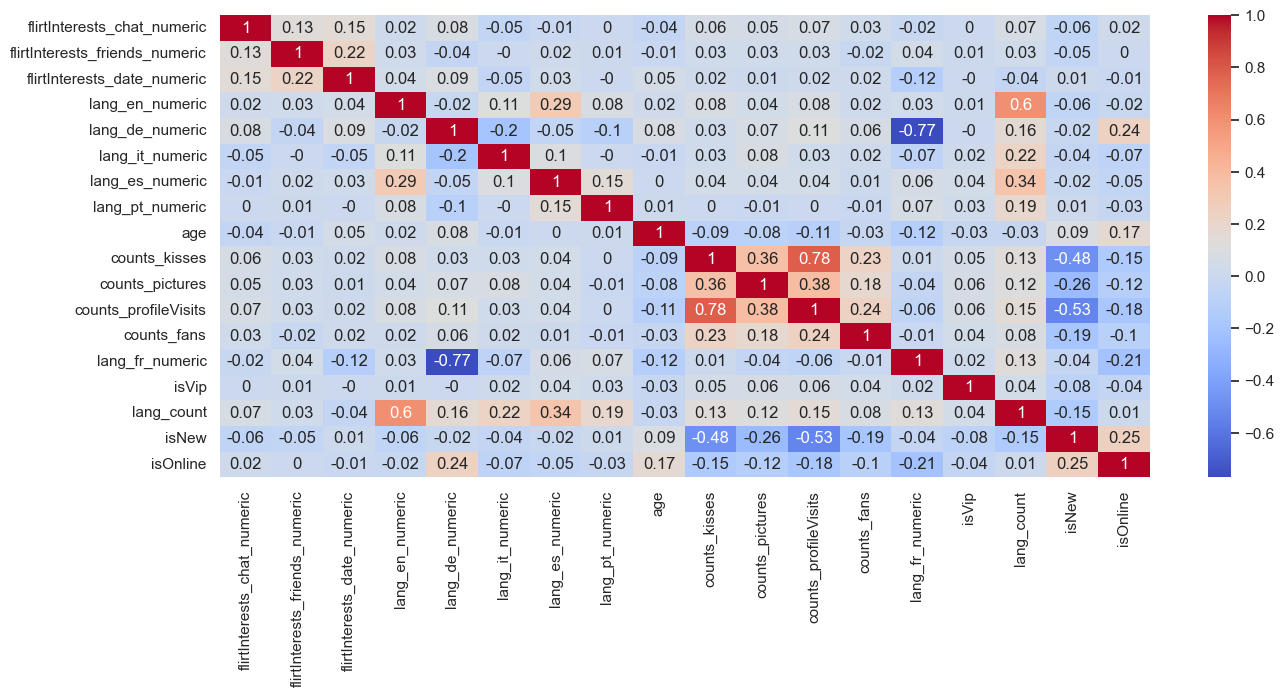

In [101]:
my_list = ['flirtInterests_chat_numeric','flirtInterests_friends_numeric','flirtInterests_date_numeric','lang_en_numeric','lang_de_numeric','lang_it_numeric','lang_es_numeric','lang_pt_numeric','age','counts_kisses','counts_pictures','counts_profileVisits','counts_fans','lang_fr_numeric','isVip','lang_count','isNew','isOnline']
plt.figure(figsize=(15,6))
correlation_matrix = df[my_list].corr(method = 'kendall').round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

In [102]:
df.describe()

,age,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,distance,isFlirtstar,isHighlighted,...,isSystemProfile,flirtInterests_chat_numeric,flirtInterests_friends_numeric,flirtInterests_date_numeric,lang_en_numeric,lang_de_numeric,lang_it_numeric,lang_es_numeric,lang_pt_numeric,lang_fr_numeric
count,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3946.000000,3967.000000,3967.000000,...,2.0,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000,3967.000000
mean,21.992690,0.567981,4.776153,3705.347114,156.432569,2.347366,0.126292,207.230005,0.011848,0.011848,...,1.0,0.626922,0.628435,0.386690,0.063272,0.649105,0.051172,0.018402,0.010587,0.283338
std,1.961222,0.325843,4.425754,6861.991349,378.515629,12.273087,1.242804,196.594017,0.108214,0.108214,...,0.0,0.483684,0.483284,0.487053,0.243482,0.477310,0.220377,0.134416,0.102362,0.450676
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.310000,2.000000,382.000000,11.000000,0.000000,0.000000,83.875000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22.000000,0.620000,4.000000,1221.000000,43.000000,0.000000,0.000000,172.000000,0.000000,0.000000,...,1.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,0.850000,6.000000,4039.000000,141.000000,0.000000,0.000000,317.000000,0.000000,0.000000,...,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,28.000000,1.000000,30.000000,164425.000000,9288.000000,241.000000,43.000000,6918.000000,1.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


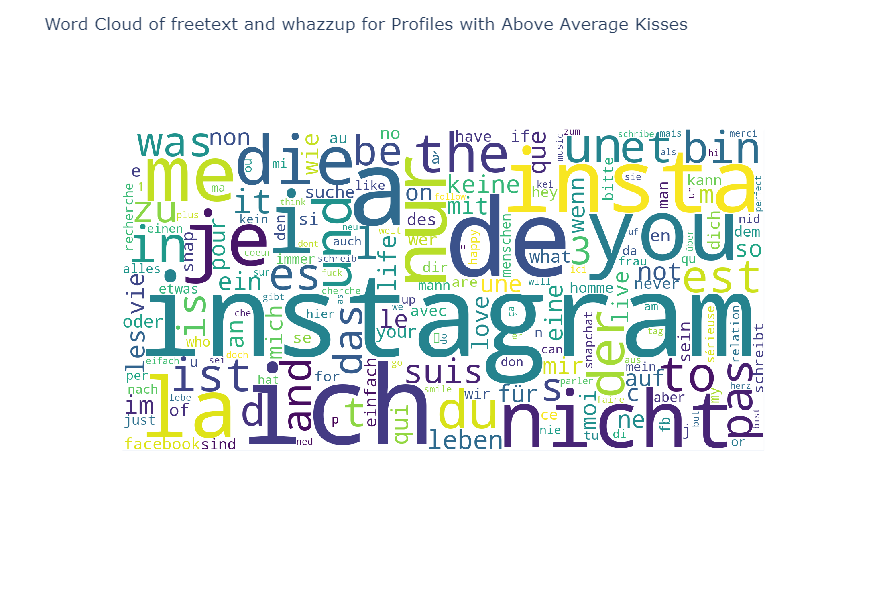

In [103]:
median_kisses = df['counts_kisses'].median()
above_average_profiles = df[df['counts_kisses'] > median_kisses]
texts = above_average_profiles[['freetext', 'whazzup']].fillna('').values.flatten()
combined_text = ' '.join(texts)
words = re.findall(r'\b\w+\b', combined_text.lower())
word_counts = Counter(words)
most_common_word, most_common_count = word_counts.most_common(1)[0]
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate_from_frequencies(word_counts)
wordcloud_image = wordcloud.to_image()
fig = px.imshow(wordcloud_image)
fig.update_layout(
    title='Word Cloud of freetext and whazzup for Profiles with Above Average Kisses',
    xaxis=dict(showgrid=False, showticklabels=False),
    yaxis=dict(showgrid=False, showticklabels=False),
    width=1200,  # הגדלת רוחב התצוגה
    height=600)  # הגדלת גובה התצוגה 

fig.show()



לכתוב שביקשנו מהצאט מילון כל מיני סוגיי אוכל בשפות שונות

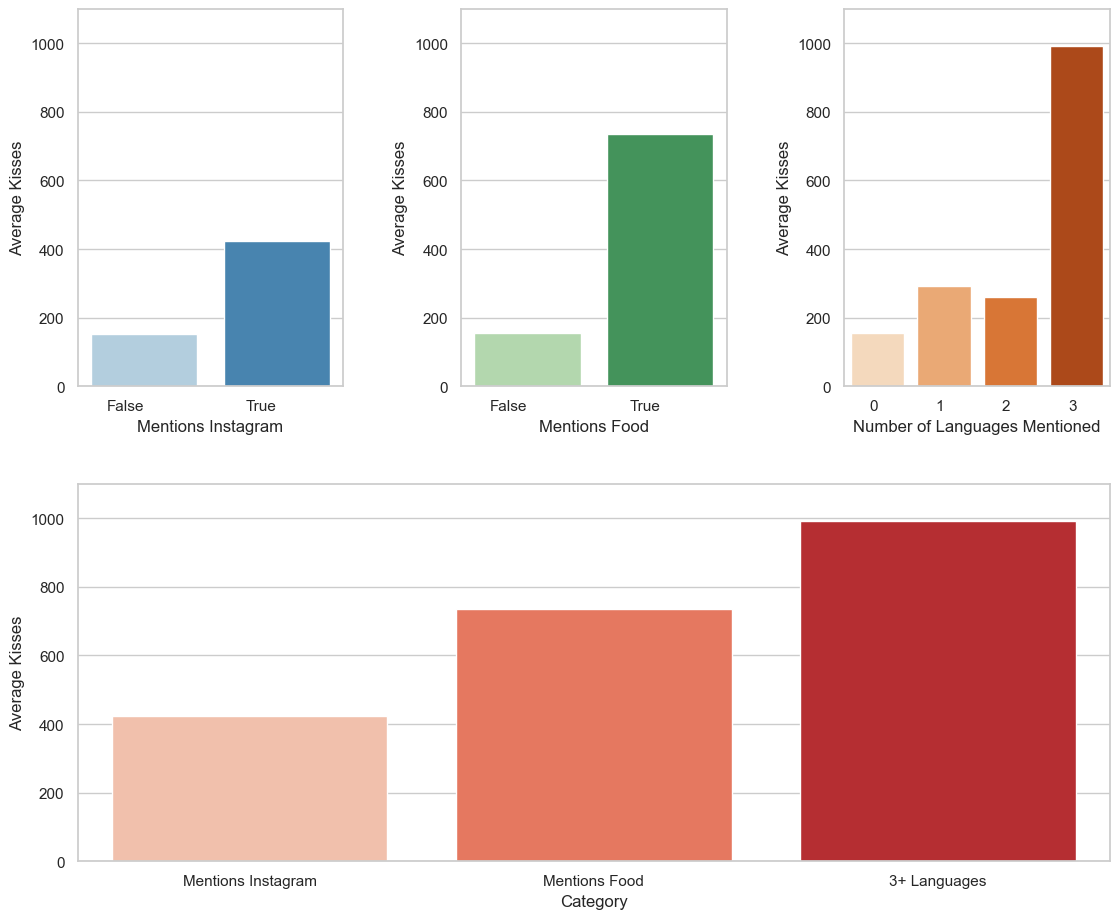

In [104]:
# בדיקת אזכור של אינסטגרם
df['mentions_instagram'] = df[['freetext', 'whazzup']].apply(lambda x: 'Instagram' in ' '.join(x.dropna().astype(str)), axis=1)
instagram_kisses = df.groupby('mentions_instagram')['counts_kisses'].mean().reset_index()
instagram_kisses.columns = ['Mentions Instagram', 'Average Kisses']

# בדיקת אזכור של אוכל
food_keywords = ['food', 'essen', 'comida', 'cibo', 'alimentos', 'aliment', '食品', 'еда', '식품', 'makanan', 'alimentación', 'غذاء']
df['mentions_food'] = df[['freetext', 'whazzup']].apply(lambda x: any(keyword in ' '.join(x.dropna().astype(str)).lower() for keyword in food_keywords), axis=1)
food_kisses = df.groupby('mentions_food')['counts_kisses'].mean().reset_index()
food_kisses.columns = ['Mentions Food', 'Average Kisses']

# בדיקת אזכור של שפות שונות
languages = ['english', 'spanish', 'french', 'german', 'italian', 'portuguese', 'dutch', 'russian', 'chinese', 'japanese', 'korean', 'arabic', 'hebrew']
for language in languages:
    df[f'mentions_{language}'] = df[['freetext', 'whazzup']].apply(lambda x: language in ' '.join(x.dropna().astype(str)).lower(), axis=1)
df['mentions_multiple_languages'] = df[[f'mentions_{language}' for language in languages]].sum(axis=1)
languages_kisses = df.groupby('mentions_multiple_languages')['counts_kisses'].mean().reset_index()
languages_kisses.columns = ['Number of Languages Mentioned', 'Average Kisses']

# יצירת הגרפים
fig, axes = plt.subplots(figsize=(12, 10), ncols=3, nrows=2)

# גרף השוואה ראשוני
sns.barplot(data=instagram_kisses, x='Mentions Instagram', y='Average Kisses', palette='Blues', ax=axes[0, 0])
sns.barplot(data=food_kisses, x='Mentions Food', y='Average Kisses', palette='Greens', ax=axes[0, 1])
sns.barplot(data=languages_kisses, x='Number of Languages Mentioned', y='Average Kisses', palette='Oranges', ax=axes[0, 2])

# הגדרת תוויות ותיחומים לגרפים
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), ha='right')
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), ha='right')
axes[0, 2].set_xticklabels(axes[0, 2].get_xticklabels(), ha='right')

axes[0, 0].set_ylim(0, 1100)
axes[0, 1].set_ylim(0, 1100)
axes[0, 2].set_ylim(0, 1100)

# גרף השוואה מתחת לשלושת הגרפים
x = ['Mentions Instagram', 'Mentions Food', '3+ Languages']
y = [instagram_kisses.loc[instagram_kisses['Mentions Instagram'] == True, 'Average Kisses'].values[0],
    food_kisses.loc[food_kisses['Mentions Food'] == True, 'Average Kisses'].values[0],
    languages_kisses.loc[languages_kisses['Number of Languages Mentioned'] >= 3, 'Average Kisses'].values[0]]

comparison_data = pd.DataFrame({'Category': x, 'Average Kisses': y})
big_ax = fig.add_subplot(2, 1, 2)
sns.barplot(data=comparison_data, x='Category', y='Average Kisses', palette=['#fcbba1', '#fb6a4a', '#cb181d'], ax=big_ax)

big_ax.set_ylim(0, 1100)


# הסרת הגרפים הריקים בשורה השנייה
fig.delaxes(axes[1, 0])
fig.delaxes(axes[1, 1])
fig.delaxes(axes[1, 2])

# כיוונון פריסת הגרפים
plt.tight_layout(pad=3.0)
plt.show()

לציין מסקנה

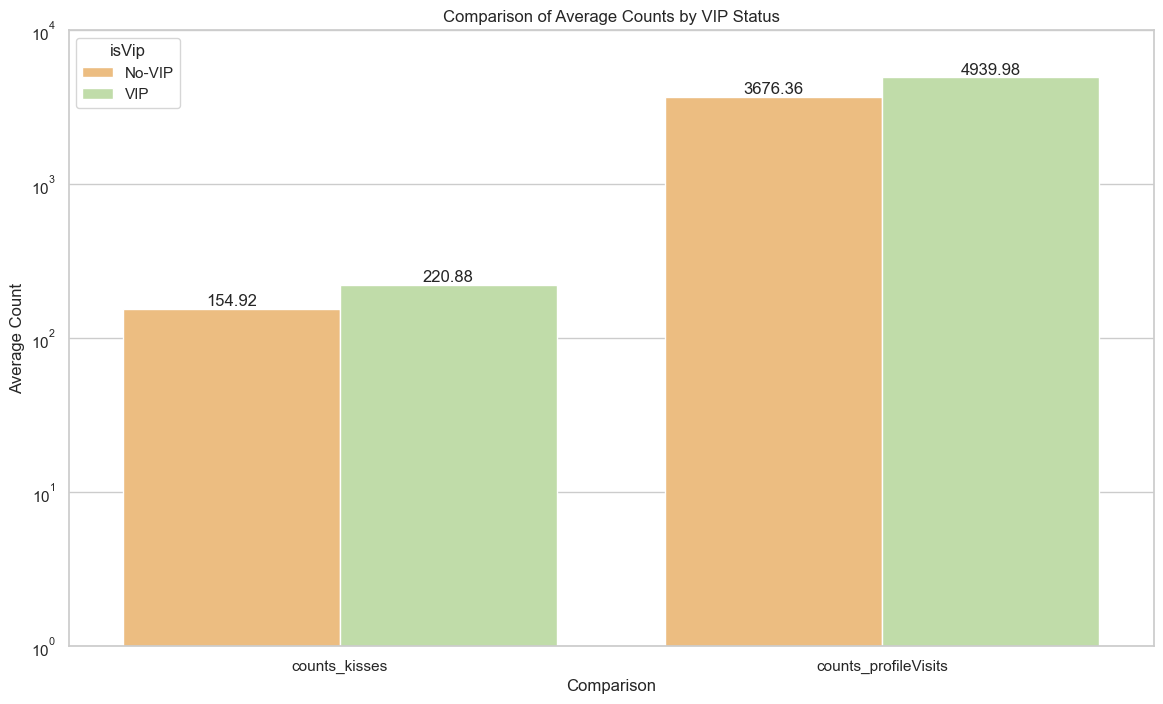

In [106]:
df_melted = pd.melt(df, id_vars=['isVip'], value_vars=['counts_kisses', 'counts_profileVisits'],var_name='Comparison', value_name='Count')
df_melted['isVip'] = df_melted['isVip'].map({1: 'VIP', 0: 'No-VIP'})

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=df_melted, x='Comparison', y='Count', hue='isVip', estimator=np.mean,errorbar=None, palette='Spectral')
plt.ylabel('Average Count')
plt.title('Comparison of Average Counts by VIP Status')
plt.yscale('log')

for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x() + i.get_width() / 2., height,f'{height:.2f}', ha='center', va='bottom')
ax.set_yticks([1, 10, 100, 1000, 10000])
plt.show()

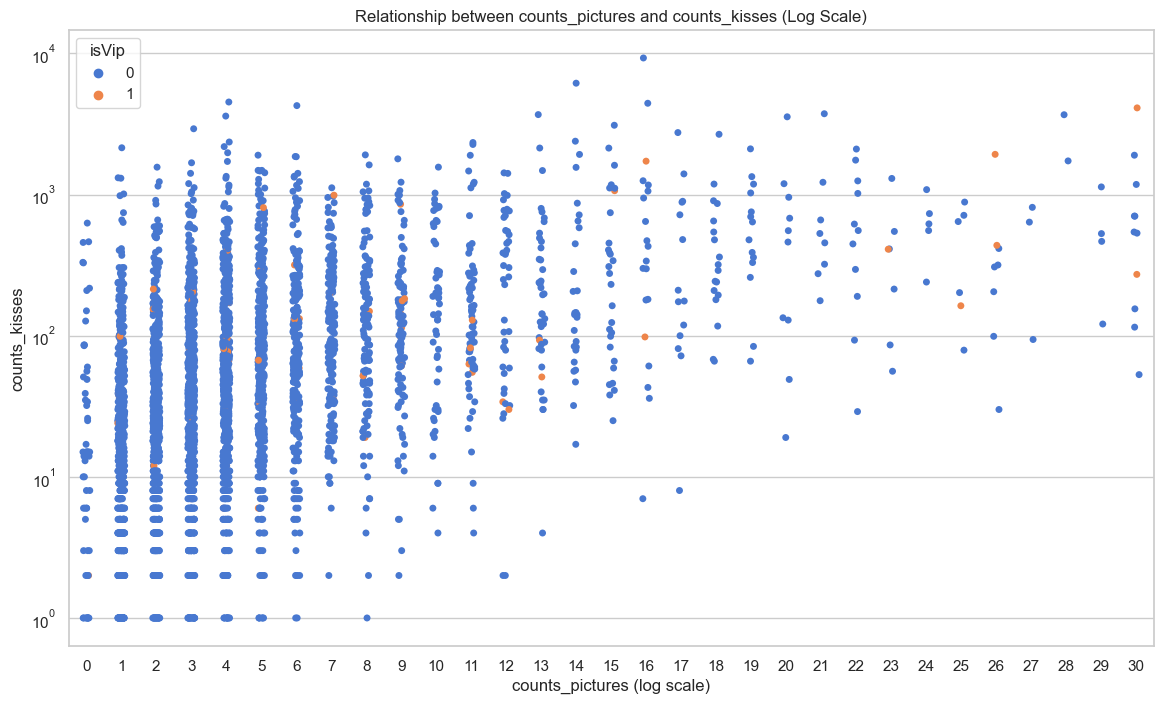

In [211]:

plt.figure(figsize=(14, 8))
sns.stripplot(x="counts_pictures", y="counts_kisses",hue="isVip", data=df)

# הגדרת ציר ה-x כקנה מידה לוגריתמי
plt.yscale('log')

# כותרות הצירים
plt.xlabel('counts_pictures (log scale)')
plt.ylabel('counts_kisses')

# כותרת הגרף
plt.title('Relationship between counts_pictures and counts_kisses (Log Scale)')

# הצגת הגרף
plt.show()

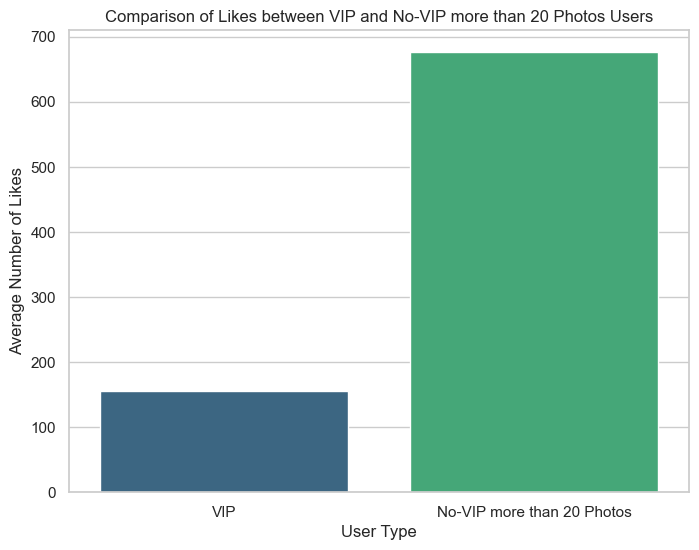

In [108]:
vip_less_than_20 = df[(df['isVip'] == True) & (df['counts_pictures'] )]
non_vip_more_than_20 = df[(df['isVip'] == False) & (df['counts_pictures'] > 20)]
filtered_df = pd.concat([vip_less_than_20, non_vip_more_than_20])
filtered_df['User Type'] = filtered_df['isVip'].apply(lambda x: 'VIP' if x else 'No-VIP more than 20 Photos')
plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, y='counts_kisses', x='User Type', estimator=np.mean,errorbar=None,palette ='viridis')
plt.xlabel('User Type')
plt.ylabel('Average Number of Likes')
plt.title('Comparison of Likes between VIP and No-VIP more than 20 Photos Users')
plt.show()

In [109]:
languages_kisses.columns

Index(['Number of Languages Mentioned', 'Average Kisses'], dtype='object')

In [110]:
vip_less_than_20 = df[(df['isVip'] == True) & (df['counts_pictures'] )]
non_vip_more_than_20 = df[(df['isVip'] == False) & (df['counts_pictures'] > 20)& (df['mentions_food']) &]
filtered_df = pd.concat([vip_less_than_20, non_vip_more_than_20])
filtered_df['User Type'] = filtered_df['isVip'].apply(lambda x: 'VIP' if x else 'No-VIP more than 20 Photos')
plt.figure(figsize=(8, 6))
sns.barplot(data=filtered_df, y='counts_kisses', x='User Type', estimator=np.mean,errorbar=None,palette ='viridis')
plt.xlabel('User Type')
plt.ylabel('Average Number of Likes')
plt.title('Comparison of Likes between VIP and No-VIP more than 20 Photos Users')
plt.show()

SyntaxError: invalid syntax (2118815468.py, line 2)

In [111]:
df["country"].value_counts()

country
CH    1636
DE    1468
FR     644
IT     138
AT      19
TR       9
BE       7
ES       6
LU       5
US       3
BA       3
CA       2
RO       2
GB       2
RU       2
BR       2
AU       2
NL       2
SC       2
LI       1
ID       1
LR       1
ET       1
HU       1
AR       1
UA       1
IN       1
PH       1
CF       1
JM       1
CZ       1
PE       1
Name: count, dtype: int64

In [129]:
full_name_country={
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BA': 'Bosnia and Herzegovina',
    'BE': 'Belgium',
    'BR': 'Brazil',
    'CA': 'Canada',
    'CF': 'Central African Republic',
    'CH': 'Switzerland',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'ES': 'Spain',
    'ET': 'Ethiopia',
    'FR': 'France',
    'GB': 'United Kingdom (UK)',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IN': 'India',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'LI': 'Liechtenstein',
    'LR': 'Liberia',
    'LU': 'Luxembourg',
    'NL': 'Netherlands',
    'PE': 'Peru',
    'PH': 'Philippines',
    'RO': 'Romania',
    'RU': 'Russia',
    'SC': 'Seychelles',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'US': 'United States'}
df['full_name_country'] = df['country'].apply(lambda x: full_name_country[x])

In [130]:
# יצירת מילון עם קווי הרוחב והאורך לכל מדינה
lat_lon_dict = {
    'CH': {'latitude': 46.8182, 'longitude': 8.2275},
    'CA': {'latitude': 56.1304, 'longitude': -106.3468},
    'DE': {'latitude': 51.1657, 'longitude': 10.4515},
    'FR': {'latitude': 46.6034, 'longitude': 1.8883},
    'US': {'latitude': 37.0902, 'longitude': -95.7129},
    'AT': {'latitude': 47.5162, 'longitude': 14.5501},
    'CZ': {'latitude': 49.8175, 'longitude': 15.4730},
    'JM': {'latitude': 18.1096, 'longitude': -77.2975},
    'SC': {'latitude': -4.6796, 'longitude': 55.4920},
    'LR': {'latitude': 6.4281, 'longitude': -9.4295},
    'BA': {'latitude': 43.9159, 'longitude': 17.6791},
    'IT': {'latitude': 41.8719, 'longitude': 12.5674},
    'LI': {'latitude': 47.1660, 'longitude': 9.5554},
    'ES': {'latitude': 40.4637, 'longitude': -3.7492},
    'NL': {'latitude': 52.1326, 'longitude': 5.2913},
    'LU': {'latitude': 49.8153, 'longitude': 6.1296},
    'AU': {'latitude': -25.2744, 'longitude': 133.7751},
    'BR': {'latitude': -14.2350, 'longitude': -51.9253},
    'RU': {'latitude': 61.5240, 'longitude': 105.3188},
    'ID': {'latitude': -0.7893, 'longitude': 113.9213},
    'GB': {'latitude': 55.3781, 'longitude': -3.4360},
    'BE': {'latitude': 50.8503, 'longitude': 4.3517},
    'ET': {'latitude': 9.1450, 'longitude': 40.4897},
    'HU': {'latitude': 47.1625, 'longitude': 19.5033},
    'AR': {'latitude': -38.4161, 'longitude': -63.6167},
    'UA': {'latitude': 48.3794, 'longitude': 31.1656},
    'IN': {'latitude': 20.5937, 'longitude': 78.9629},
    'PH': {'latitude': 12.8797, 'longitude': 121.7740},
    'CF': {'latitude': 6.6111, 'longitude': 20.9394},
    'RO': {'latitude': 45.9432, 'longitude': 24.9668},
    'TR': {'latitude': 38.9637, 'longitude': 35.2433},
    'PE': {'latitude': -9.1900, 'longitude': -75.0152}
}

# הוספת העמודות החדשות עם קווי הרוחב והאורך
df['latitude'] = df['country'].map(lambda x: lat_lon_dict.get(x, {}).get('latitude', None))
df['longitude'] = df['country'].map(lambda x: lat_lon_dict.get(x, {}).get('longitude', None))

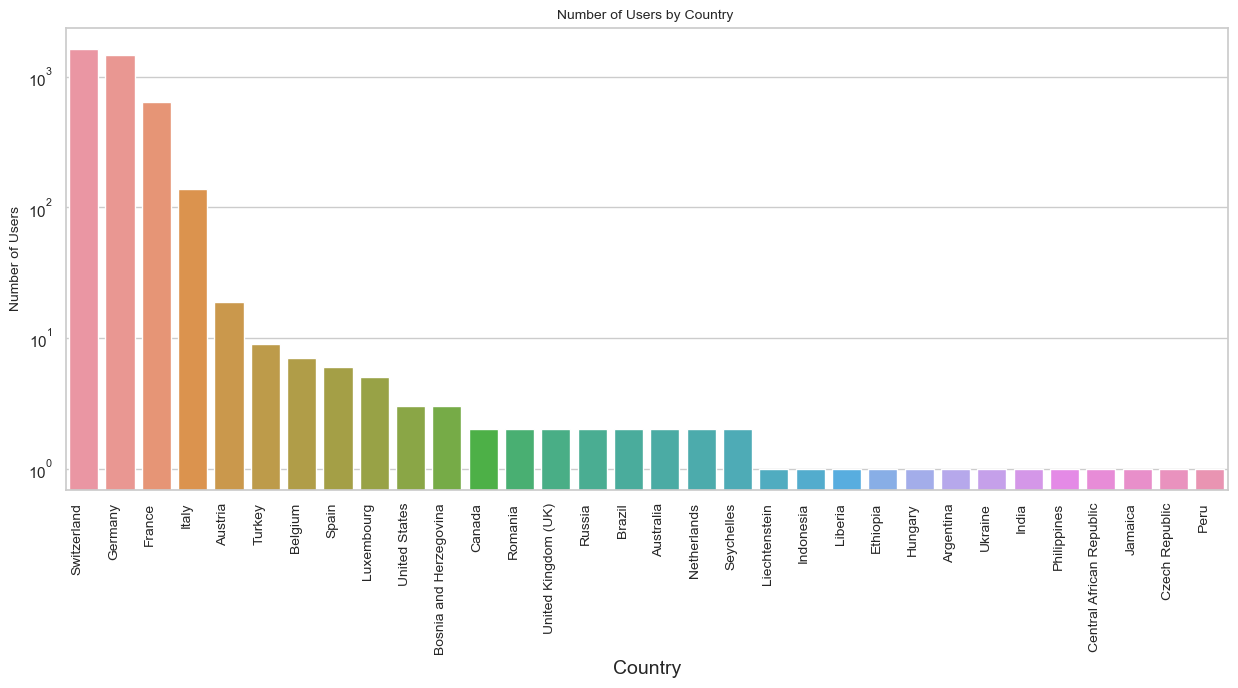

In [131]:
country_counts = df["full_name_country"].value_counts()
myorder = country_counts.index
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=country_counts.index, y=country_counts.values, order=myorder)
ax.set_yscale('log')
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Users', fontsize=10)
plt.title('Number of Users by Country ', fontsize=10)

plt.show()

מעל 10 משתמשים המדינה מוגדרת כמדינה פופולרית, כלומר המדינות הפופולריות הן אוסטריה, איטליה, צרפת, גרמניה ושוויץ

C:\Users\ronie\AppData\Local\Temp\ipykernel_36772\834101857.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



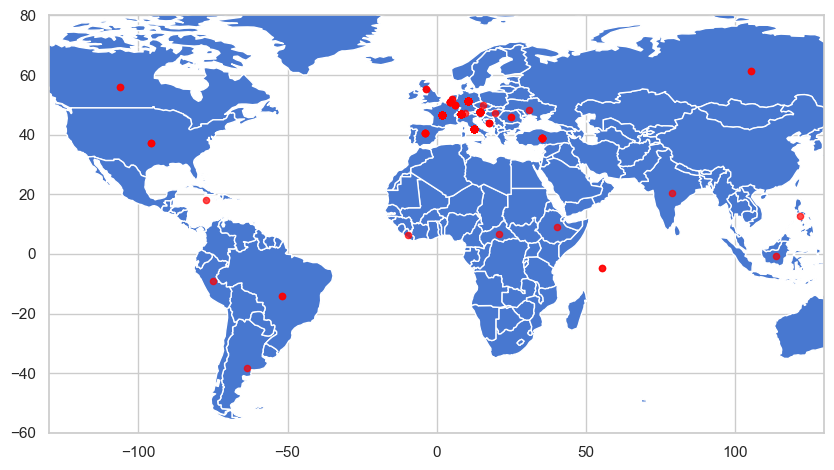

In [132]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax)
gdf.plot(ax=ax, markersize=20,marker='o', color='red', alpha=0.7)
ax.set_xlim([-130, 130])
ax.set_ylim([-60, 80])
plt.show()

In [146]:
location_country_mapping = {
    'Bassens': 'France',
    'Liège': 'Belgium',
    'Charleroi': 'Belgium',
    'Zürich': 'Switzerland',
    'Luxembourg': 'Luxembourg',
    'Kerkrade': 'Netherlands',
    'Geneva': 'Switzerland',
    'Viviers-sur-Chiers': 'France',
    'Balsthal': 'Switzerland',
    'Kall': 'Germany',
    'Waldbronn': 'Germany',
    'Basilea': 'Switzerland',
    'Le Grand-Saconnex': 'Switzerland',
    'Emmendingen': 'Germany',
    'Ascona': 'Switzerland',
    'Torino': 'Italy',
    'Évian-les-Bains': 'France',
    'Thuin': 'Belgium',
    'Oberglatt': 'Switzerland',
    'Amel': 'Belgium',
    'Antibes': 'France',
    'Dudelange': 'Luxembourg',
    'Nittel': 'Germany',
    'Mainz': 'Germany',
    'Genève': 'Switzerland',
    'Saarlouis': 'Germany',
    'Berne': 'Switzerland',
    'Lutry': 'Switzerland',
    'Cologny': 'Switzerland',
    'Ludwigsburg': 'Germany',
    'Aarau': 'Switzerland',
    'Embrach': 'Switzerland',
    'Glis': 'Switzerland',
    'Lyss': 'Switzerland',
    'Sennwald': 'Switzerland',
    'Pforzheim': 'Germany',
    'Zug': 'Switzerland',
    'Düdelingen': 'Luxembourg',
    'Froideville': 'Switzerland',
    'Untersiggenthal': 'Switzerland',
    'Olten': 'Switzerland',
    'Freiburg': 'Germany',
    'Sallanches': 'France',
    'Lyon': 'France',
    'Memmingen': 'Germany',
    'Lebach': 'Germany',
    'Collex-Bossy': 'Switzerland',
    'Chardonne': 'Switzerland',
    'Dresden': 'Germany',
    'Lausanne': 'Switzerland'}
# סינון המשתמשים מהמדינות הקטנות
country_distribution = df['full_name_country'].value_counts()
small_countries_users = df[df['full_name_country'].isin(country_distribution[country_distribution <= 10].index)].copy()

# הוספת עמודת מדינה על פי המיפוי
small_countries_users['country_from_location'] = small_countries_users['location'].map(location_country_mapping)

# הצגת המשתמשים ומדינותיהם
users_and_locations_with_countries = small_countries_users[['name', 'location', 'country_from_location']]

# הדפסת הנתונים
users_and_locations_with_countries

,name,location,country_from_location
3,Qqkwmdowlo,Berne,Switzerland
24,🍒SweeT_Cherry🍒,Untersiggenthal,Switzerland
102,Domini,Ludwigsburg,Germany
105,swaga_,Aarau,Switzerland
115,ShellyBee,Embrach,Switzerland
...,...,...,...
3957,B**f,Bassens,France
3963,B**f,Bassens,France
3969,B**f,Bassens,France
3975,B**f,Bassens,France


In [209]:
df["isVip"].unique()

array([0, 1], dtype=int64)

In [208]:
country_distribution

full_name_country
Switzerland                 1636
Germany                     1468
France                       644
Italy                        138
Austria                       19
Turkey                         9
Belgium                        7
Spain                          6
Luxembourg                     5
United States                  3
Bosnia and Herzegovina         3
Canada                         2
Romania                        2
United Kingdom (UK)            2
Russia                         2
Brazil                         2
Australia                      2
Netherlands                    2
Seychelles                     2
Liechtenstein                  1
Indonesia                      1
Liberia                        1
Ethiopia                       1
Hungary                        1
Argentina                      1
Ukraine                        1
India                          1
Philippines                    1
Central African Republic       1
Jamaica                  

In [207]:
small_countries_users

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,mentions_japanese,mentions_korean,mentions_arabic,mentions_hebrew,mentions_multiple_languages,full_name_country,latitude,longitude,country_from_location,category
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,False,False,False,False,0,Canada,56.1304,-106.3468,Switzerland,Popular Countries
24,F,M,24,🍒SweeT_Cherry🍒,0.19,5,22847,1282,63,7,...,False,False,False,False,0,United States,37.0902,-95.7129,Switzerland,Popular Countries
102,F,M,22,Domini,0.46,3,9896,413,2,0,...,False,False,False,False,0,Czech Republic,49.8175,15.4730,Germany,Popular Countries
105,F,M,19,swaga_,0.23,4,21224,316,0,1,...,False,False,False,False,0,Jamaica,18.1096,-77.2975,Switzerland,Popular Countries
115,F,M,24,ShellyBee,1.00,11,14526,1116,19,9,...,False,False,False,False,0,Seychelles,-4.6796,55.4920,Switzerland,Popular Countries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,F,M,21,B**f,0.85,0,267,14,0,0,...,False,False,False,False,0,Turkey,38.9637,35.2433,France,Popular Countries
3963,F,M,21,B**f,0.85,0,267,14,0,0,...,False,False,False,False,0,Turkey,38.9637,35.2433,France,Popular Countries
3969,F,M,21,B**f,0.85,0,267,14,0,0,...,False,False,False,False,0,Turkey,38.9637,35.2433,France,Popular Countries
3975,F,M,21,B**f,0.85,0,288,15,0,0,...,False,False,False,False,0,Turkey,38.9637,35.2433,France,Popular Countries


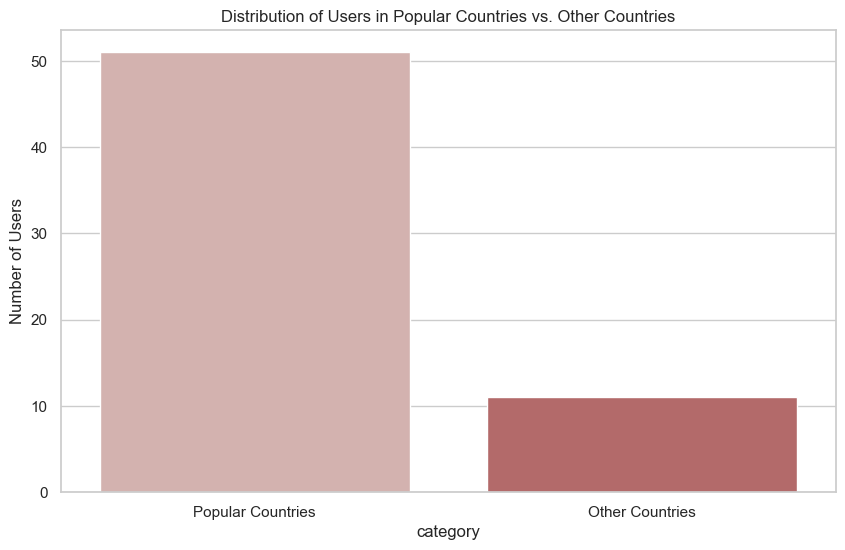

In [184]:
countries_of_interest = ['Austria', 'Italy', 'France', 'Germany', 'Switzerland']
small_countries_users['category'] = small_countries_users['country_from_location'].apply(lambda x: 'Popular Countries' if x in countries_of_interest else 'Other Countries')
plt.figure(figsize=(10, 6))
sns.countplot(data=small_countries_users, x='category', palette=['#D9ADA9', '#BF5E5E'])
plt.title('Distribution of Users in Popular Countries vs. Other Countries')
plt.ylabel('Number of Users')
plt.show()

In [181]:
small_countries_users['category'].value_counts()

category
Popular Countries    51
Other Countries      11
Name: count, dtype: int64

In [159]:
small_countries_users

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,mentions_japanese,mentions_korean,mentions_arabic,mentions_hebrew,mentions_multiple_languages,full_name_country,latitude,longitude,country_from_location,category
3,F,none,20,Qqkwmdowlo,0.12,3,22187,1015,2,3,...,False,False,False,False,0,Canada,56.1304,-106.3468,Switzerland,Popular Countries
24,F,M,24,🍒SweeT_Cherry🍒,0.19,5,22847,1282,63,7,...,False,False,False,False,0,United States,37.0902,-95.7129,Switzerland,Popular Countries
102,F,M,22,Domini,0.46,3,9896,413,2,0,...,False,False,False,False,0,Czech Republic,49.8175,15.4730,Germany,Popular Countries
105,F,M,19,swaga_,0.23,4,21224,316,0,1,...,False,False,False,False,0,Jamaica,18.1096,-77.2975,Switzerland,Popular Countries
115,F,M,24,ShellyBee,1.00,11,14526,1116,19,9,...,False,False,False,False,0,Seychelles,-4.6796,55.4920,Switzerland,Popular Countries
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3957,F,M,21,B**f,0.85,0,267,14,0,0,...,False,False,False,False,0,Turkey,38.9637,35.2433,France,Popular Countries
3963,F,M,21,B**f,0.85,0,267,14,0,0,...,False,False,False,False,0,Turkey,38.9637,35.2433,France,Popular Countries
3969,F,M,21,B**f,0.85,0,267,14,0,0,...,False,False,False,False,0,Turkey,38.9637,35.2433,France,Popular Countries
3975,F,M,21,B**f,0.85,0,288,15,0,0,...,False,False,False,False,0,Turkey,38.9637,35.2433,France,Popular Countries


In [160]:
small_countries_users["category"].unique()

array(['Popular Countries', 'Other Countries'], dtype=object)

לבדוק אם אנחנו רוצות להציג את החלוקה של כל המשתמשים בכל המדינוות לפי מיקום 

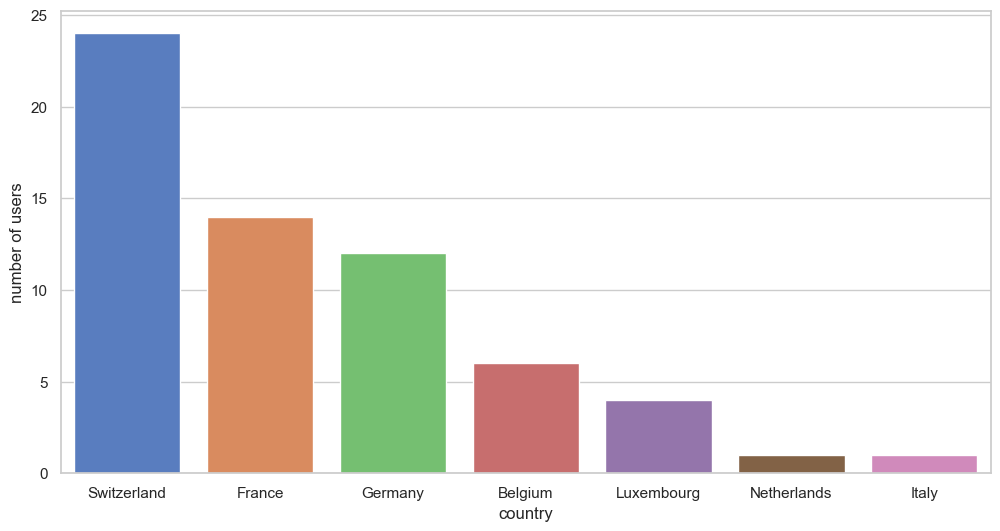

In [138]:
plt.figure(figsize=(12, 6))
sns.countplot(data=small_countries_users, x='country_from_location', order=small_countries_users['country_from_location'].value_counts().index)
plt.xlabel('country')
plt.ylabel('number of users')
#plt.xticks(rotation=45)
plt.show()

In [182]:

# עמודות שפה
language_columns = ['lang_fr', 'lang_en', 'lang_de', 'lang_it', 'lang_es', 'lang_pt']

# בניית DataFrame עם עמודות השפות
languages_spoken = small_countries_users[['name', 'location', 'country_from_location'] + language_columns]

# הצגת הנתונים
(languages_spoken)

,name,location,country_from_location,lang_fr,lang_en,lang_de,lang_it,lang_es,lang_pt
3,Qqkwmdowlo,Berne,Switzerland,True,True,False,False,False,False
24,🍒SweeT_Cherry🍒,Untersiggenthal,Switzerland,True,True,True,True,False,False
102,Domini,Ludwigsburg,Germany,False,False,True,False,False,False
105,swaga_,Aarau,Switzerland,False,True,True,False,False,False
115,ShellyBee,Embrach,Switzerland,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...
3957,B**f,Bassens,France,True,False,False,False,False,False
3963,B**f,Bassens,France,True,False,False,False,False,False
3969,B**f,Bassens,France,True,False,False,False,False,False
3975,B**f,Bassens,France,True,False,False,False,False,False


In [203]:
# סינון המשתמשים בגרמניה מתוך קבוצת "אחר"
german_users = small_countries_users[small_countries_users['country_from_location'] == 'Germany]

# השוואת כמות הלייקים הממוצעת בין דוברי גרמנית ושאינם דוברי גרמנית
likes_de_speakers = german_users[german_users['lang_de'] == True]['counts_kisses'].mean()
likes_non_de_speakers = german_users[german_users['lang_de'] == False]['counts_kisses'].mean()

# הכנת הנתונים עבור התרשים
comparison_data = pd.DataFrame({
    'Language': ['German Speakers', 'Non-German Speakers'],
    'Average Likes': [likes_de_speakers, likes_non_de_speakers]
})

# הצגת התרשים
plt.figure(figsize=(10, 6))
sns.barplot(x='Language', y='Average Likes', data=comparison_data, palette='Spectral')
plt.title('Average Likes Comparison Between German Speakers and Non-German Speakers')
plt.ylabel('Average Likes')
plt.xlabel('User Group')
plt.show()

SyntaxError: unterminated string literal (detected at line 2) (3510090445.py, line 2)

In [190]:
german_users

,gender,genderLooking,age,name,counts_details,counts_pictures,counts_profileVisits,counts_kisses,counts_fans,counts_g,...,mentions_japanese,mentions_korean,mentions_arabic,mentions_hebrew,mentions_multiple_languages,full_name_country,latitude,longitude,country_from_location,category
102,F,M,22,Domini,0.46,3,9896,413,2,0,...,False,False,False,False,0,Czech Republic,49.8175,15.4730,Germany,Popular Countries
408,F,M,22,stefanie shoco,1.00,8,38703,1623,0,0,...,False,False,False,False,0,Spain,40.4637,-3.7492,Germany,Popular Countries
538,F,M,22,Tamara,0.62,13,11407,195,0,0,...,False,False,False,False,0,Australia,-25.2744,133.7751,Germany,Popular Countries
798,F,M,21,Njuta,0.08,2,6950,178,0,0,...,False,False,False,False,0,Russia,61.5240,105.3188,Germany,Popular Countries
962,F,M,23,T91,0.54,2,1210,25,2,0,...,False,False,False,False,0,Spain,40.4637,-3.7492,Germany,Popular Countries
1109,F,both,28,LOVOO Team,0.20,5,0,0,0,0,...,False,False,False,False,0,United Kingdom (UK),55.3781,-3.4360,Germany,Popular Countries
1411,F,M,24,Engelchen,0.77,8,6563,276,11,0,...,False,False,False,False,0,Argentina,-38.4161,-63.6167,Germany,Popular Countries
1765,F,F,22,Danie,0.77,7,5810,209,0,0,...,False,False,False,False,0,United States,37.0902,-95.7129,Germany,Popular Countries
3374,F,M,25,nessa,0.31,1,13,1,0,0,...,False,False,False,False,0,Luxembourg,49.8153,6.1296,Germany,Popular Countries
3456,F,none,19,Michaela,0.19,2,85,5,0,0,...,False,False,False,False,0,Australia,-25.2744,133.7751,Germany,Popular Countries


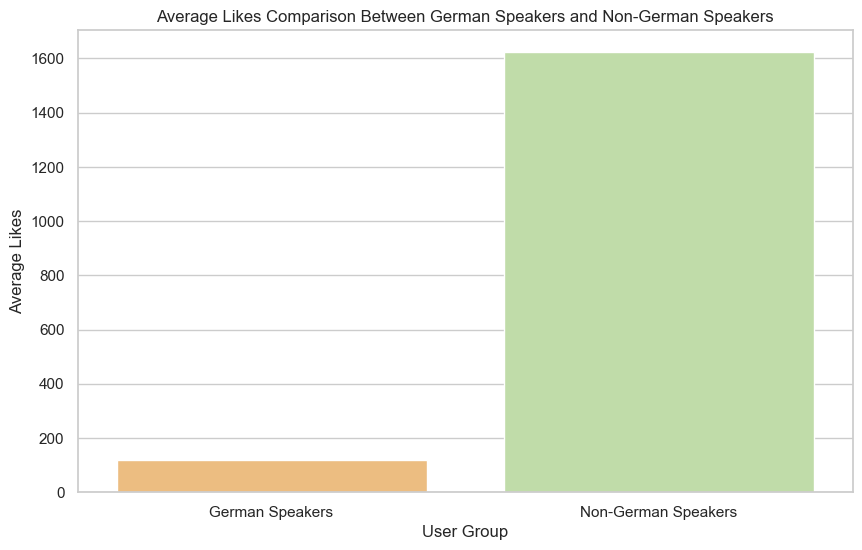

In [206]:
# סינון המשתמשים בגרמניה מתוך קבוצת "אחר"
german_users = small_countries_users[small_countries_users['country_from_location'] == 'Germany']

# השוואת כמות הלייקים הממוצעת בין דוברי גרמנית ושאינם דוברי גרמנית
likes_de_speakers = german_users[german_users['lang_de'] == True]['counts_kisses'].mean()
likes_non_de_speakers = german_users[german_users['lang_de'] == False]['counts_kisses'].mean()

# הכנת הנתונים עבור התרשים
comparison_data = pd.DataFrame({
    'Language': ['German Speakers', 'Non-German Speakers'],
    'Average Likes': [likes_de_speakers, likes_non_de_speakers]
})

# הצגת התרשים
plt.figure(figsize=(10, 6))
sns.barplot(x='Language', y='Average Likes', data=comparison_data, palette='Spectral')
plt.title('Average Likes Comparison Between German Speakers and Non-German Speakers')
plt.ylabel('Average Likes')
plt.xlabel('User Group')
plt.show()

In [183]:
lang_it_true_count = small_countries_users['lang_it'].sum()
lang_it_true_count

4

In [142]:
# סינון המשתמשים הנמצאים בשוויץ
switzerland_users = small_countries_users[small_countries_users['country_from_location'] == 'Switzerland']

# חישוב מספר המשתמשים הדוברים כל שפה
lang_fr_count = switzerland_users['lang_fr']==True.sum()
lang_de_count = switzerland_users['lang_de']==True.sum()
lang_it_count = switzerland_users['lang_it']==True.sum()

lang_fr_count, lang_de_count, lang_it_count

(7, 12, 4)

In [117]:
location_counts = filtered_df['location'].value_counts()
# Display the location counts
print("\nLocations of Users from Countries with Fewer than 20 Users:")
print(location_counts)


Locations of Users from Countries with Fewer than 20 Users:
location
Basel                   4
Lyon                    4
Freiburg im Breisgau    3
Torino                  3
Zürich                  3
                       ..
Bressey-sur-Tille       1
Küssnacht am Rigi       1
Weil am Rhein           1
Ostfildern              1
Onex                    1
Name: count, Length: 95, dtype: int64


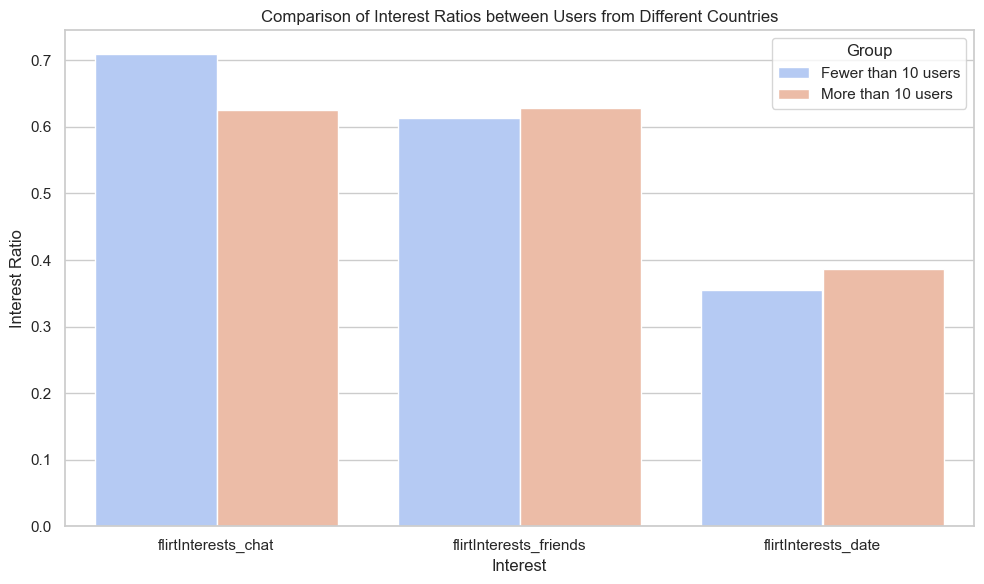

In [118]:
# ספירת מספר המשתמשים בכל מדינה
country_counts = df['country'].value_counts()
countries_with_fewer_than_10_users = country_counts[country_counts <= 10].index
countries_more_than_10_users = country_counts[country_counts > 10].index

# סינון המשתמשים לפי הקבוצות
filtered_df_fewer = df[df['country'].isin(countries_with_fewer_than_10_users)]
filtered_df_more = df[df['country'].isin(countries_more_than_10_users)]

# ניתוח תחומי העניין - חישוב היחס מכלל המשתמשים בכל קבוצה
interest_columns = ['flirtInterests_chat', 'flirtInterests_friends', 'flirtInterests_date']
interest_fewer_than_10_users = (filtered_df_fewer[interest_columns].sum() / len(filtered_df_fewer)).reset_index()
interest_more_than_10_users = (filtered_df_more[interest_columns].sum() / len(filtered_df_more)).reset_index()

# הוספת שם הקטגוריה לכל קבוצה
interest_fewer_than_10_users.columns = ['Interest', 'Ratio']
interest_fewer_than_10_users['Group'] = 'Fewer than 10 users'
interest_more_than_10_users.columns = ['Interest', 'Ratio']
interest_more_than_10_users['Group'] = 'More than 10 users'

# שילוב הנתונים ל-DataFrame אחד
comparison_df = pd.concat([interest_fewer_than_10_users, interest_more_than_10_users])

# יצירת גרף עמודות להשוואה
plt.figure(figsize=(10, 6))
sns.barplot(x='Interest', y='Ratio', hue='Group', data=comparison_df, palette='coolwarm')
plt.title('Comparison of Interest Ratios between Users from Different Countries')
plt.xlabel('Interest')
plt.ylabel('Interest Ratio')
plt.tight_layout()

# הצגת הגרף
plt.show()

In [119]:
# מיזוג הנתונים
merged_df = filtered_df.merge(destination_user_counts, left_on='location', right_on='location')

# יצירת גרף עמודות עם קווים
fig, ax = plt.subplots(figsize=(14, 8))

# גרף עמודות למדינות המקור
sns.barplot(x='country', y='user_count_x', data=merged_df, color='blue', label='Origin Country', ax=ax)

# גרף עמודות למדינות היעד
sns.barplot(x='location', y='user_count_y', data=merged_df, color='green', label='Destination Country', ax=ax)

# הוספת קווים בין עמודות המקור ליעד
for index, row in merged_df.iterrows():
    origin_x = row['country']
    origin_y = row['user_count_x']
    destination_x = row['location']
    destination_y = row['user_count_y']
    
    plt.plot([origin_x, destination_x], [origin_y, destination_y], 'k-', linewidth=1)

# כוונון הגרף
ax.set_xlabel('Country')
ax.set_ylabel('Number of Users')
plt.title('User Movement from Origin to Destination Countries')
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'destination_user_counts' is not defined

C:\Users\ronie\AppData\Local\Temp\ipykernel_36772\1247051471.py:46: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



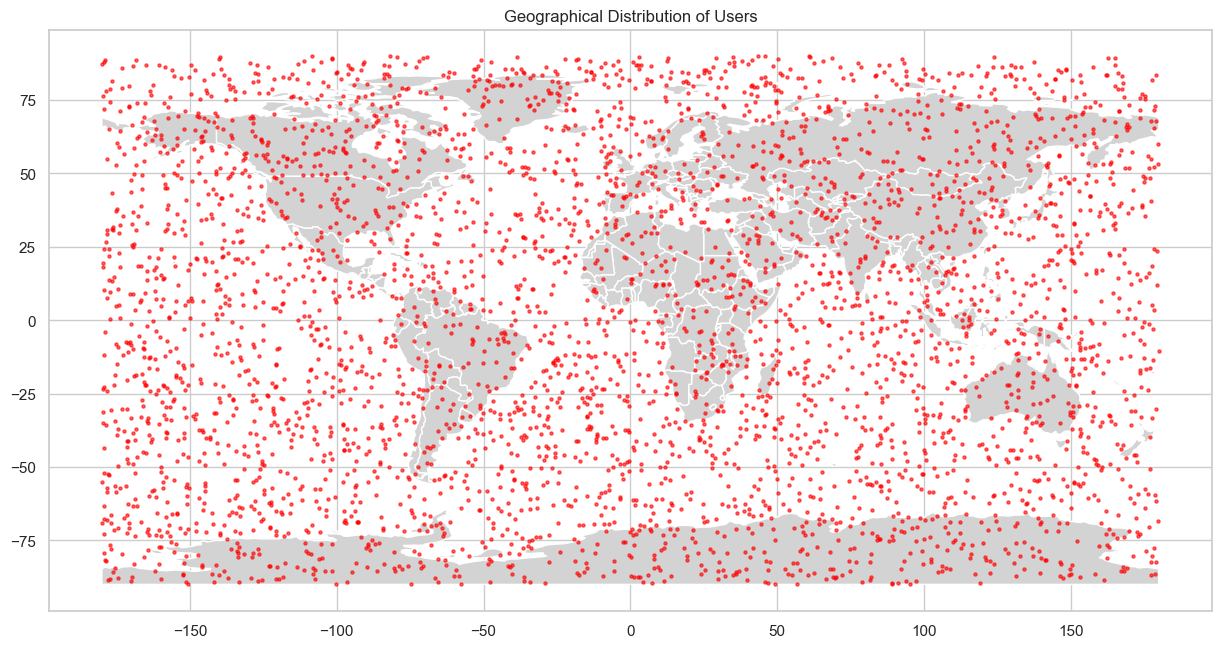

In [120]:
# Mock data: Generating random coordinates for demonstration
import numpy as np

np.random.seed(0)
df['latitude'] = np.random.uniform(-90, 90, size=len(df))
df['longitude'] = np.random.uniform(-180, 180, size=len(df))

# Full name mapping for countries
full_name_country = {
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BA': 'Bosnia and Herzegovina',
    'BE': 'Belgium',
    'BR': 'Brazil',
    'CA': 'Canada',
    'CF': 'Central African Republic',
    'CH': 'Switzerland',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'ES': 'Spain',
    'ET': 'Ethiopia',
    'FR': 'France',
    'GB': 'United Kingdom (UK)',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IN': 'India',
    'IT': 'Italy',
    'JM': 'Jamaica',
    'LI': 'Liechtenstein',
    'LR': 'Liberia',
    'LU': 'Luxembourg',
    'NL': 'Netherlands',
    'PE': 'Peru',
    'PH': 'Philippines',
    'RO': 'Romania',
    'RU': 'Russia',
    'SC': 'Seychelles',
    'TR': 'Turkey',
    'UA': 'Ukraine',
    'US': 'United States'
}
df['full_name_country'] = df['country'].apply(lambda x: full_name_country.get(x, 'Unknown'))

# Load a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plotting the data
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, markersize=5, marker='o', color='red', alpha=0.6)
plt.title('Geographical Distribution of Users')
plt.show()